# Regresión Logistica con Python y scikit-learn

En este artículo, exploraremos cómo utilizar **la regresión logística con Python para construir algoritmo de machine learning para clasificación de datos de un evento binario o multiclase**. Antes de profundizar en la regresión logística, es importante tener una comprensión sólida de los requisitos previos necesarios para abordar esta técnica de modelado.

Estos son los requisitos previos que se necesitan para abordar la regresión logistica con Python:

- [Conocimiento de matemáticas para la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-a-Funciones-Matematicas-para-Data-Science-e-Inteligencia-Artificial-f9a47b52-0308-4e95-a3d3-c3de3ef7b14f)

- [Conocimiento de análisis exploratorio de datos.](https://deepnote.com/@mazzaroli/Analisis-exploratorio-de-datos-caba7762-e435-481e-9060-523263a820b1)
 
- Conocimiento de visualización de datos con [Matplotlib](https://matplotlib.org/stable/users/index.html) y [Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html).

- [Conocimiento de los fundamentos de la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-teorica-al-machine-learning-c4aded88-a409-4731-b650-6b3b43963d21)

- [Conocimiento de los fundamentos de regresión lineal](https://deepnote.com/@mazzaroli/Regresion-Lineal-con-Python-y-scikit-learn-86f7bb72-770c-4e28-9e84-0355aed93892)


## Que es la regresion logistica?

En el ámbito del Machine Learning, existen tres tipos de algoritmos: el aprendizaje supervisado, el aprendizaje no supervisado y el aprendizaje por refuerzo. **La regresión logística es un algoritmo de aprendizaje supervisado**

Dentro del aprendizaje supervisados están los **algoritmos de clasificación y regresión**

**La regresión logística se utiliza** principalmente **para problemas de clasificación**, **donde se tiene que predecir la probabilidad de que un evento pertenezca a una de dos categorías posibles**, como (sí/no), (verdadero/falso), (spam/no spam), entre otros.

**La idea** básica detrás **de la regresión logística es crear una función** matemática **que pueda clasificar los datos acorde a la relación entre sus características** o variables predictoras y la variable objetivo o la categoría a predecir. **Esta función es la función sigmoide** y su fórmula y grafico son los siguiente.

$\displaystyle s(x) = \frac{1}{(1 + e^{-x})}$

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Funci%C3%B3n_sigmoide_01.svg/1200px-Funci%C3%B3n_sigmoide_01.svg.png' width=400>

**La función sigmoide se utiliza para calcular la probabilidad de que un evento pertenezca a una de dos categorías posibles,** tomando cualquier valor de entrada y comprimiendolo a un rango entre 0 y 1, lo que la hace ideal para estimar la probabilidad.

- **Si la probabilidad es mayor que 0.5**, se clasifica como **perteneciente a la categoría 1**,

- **Si es menor que 0.5**, se clasifica como **perteneciente a la categoría 0.** 

En otras palabras, si la probabilidad calculada es mayor al 50%, se predice que el evento pertenece a la categoría 1, y si es menor al 50%, se predice que pertenece a la categoría 0.


### Ejemplo

Supongamos que **un profesor quiere predecir la probabilidad de que un estudiante apruebe un examen en función de las horas de estudio.** Para ello, **recopila datos de 50 estudiantes** que han tomado el examen en el pasado y **registra las horas que cada uno estudió y si aprobó o no el examen**. A continuación, **el profesor construye un modelo de regresión logística para predecir la probabilidad de que un estudiante apruebe el examen en función de las horas de estudio.**

El profesor asigna la variable **"1" si un estudiante aprueba** el examen y **"0" si no lo aprueba**. Luego, utiliza la **probabilidad de aprobar como variable objetivo** (eje $Y$) y las **horas de estudio como variables predictoras** (eje $X$). Luego, **ajusta la función sigmoide al conjunto de datos** para estimar la probabilidad de que un estudiante apruebe el examen en función de las horas de estudio.

Finalmente, el profesor puede utilizar este modelo para predecir la probabilidad de que un estudiante apruebe el examen en función de las horas de estudio que dedica. 

Por ejemplo, **si un estudiante estudia durante 10 horas**, la función sigmoide puede predecir **una probabilidad del 80% de que el estudiante apruebe el examen**. En cambio, **si un estudiante estudia solo 5 horas**, la función sigmoide puede predecir **una probabilidad del 40% de que el estudiante apruebe el examen**.


<img src='https://datascientest.com/es/wp-content/uploads/sites/7/2020/10/unnamed-4.png' width=400>


## Tu primera clasificación con regresión logística

Aprenderemos a construir nuestra primera regresión logística con Python y la librería Scikit-learn en solo unos pocos pasos.

### Importar librerías

In [193]:
import numpy as np  # Librería para operaciones matemáticas con arrays
import pandas as pd  # Librería para manipulación de datos en formato tabla
import matplotlib.pyplot as plt  # Librería para visualización de gráficos
import seaborn as sns  # Librería para visualización de datos estadísticos
from sklearn.datasets import load_digits  # Conjunto de datos de dígitos escritos a mano
from sklearn.linear_model import LogisticRegression  # Modelo de regresión logística

### Carga de datos

**[load_digits](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)** es un conjunto de datos de dígitos escritos a mano que **consta de 1.797 imágenes** de **resolución 8x8 píxeles**, **cada píxel está representado como un valor en escala de grises entre 0 y 16**. 


**Las etiquetas corresponden a los números enteros del 0 al 9**, por lo que es útil para tareas de clasificación multiclase y es comúnmente utilizado como un ejemplo introductorio en la clasificación de imágenes en Machine Learning.

<img src='https://user-images.githubusercontent.com/8764683/59962629-0d3ce780-9523-11e9-8b21-5ffc9c588fd7.png' width=700>

In [194]:
# Cargamos el conjunto de datos digits
digits = load_digits()

In [195]:
# Accedemos a la primera fila de datos que representa la primera imagen en formato vectorial
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [196]:
# Transforma el vector de la primera imagen en una matriz de 8x8 píxeles
image = np.reshape(digits.data[8],(8,8))
image

array([[ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0., 12., 14., 14., 12.,  0.,  0.],
       [ 0.,  0.,  9., 10.,  0., 15.,  4.,  0.],
       [ 0.,  0.,  3., 16., 12., 14.,  2.,  0.],
       [ 0.,  0.,  4., 16., 16.,  2.,  0.,  0.],
       [ 0.,  3., 16.,  8., 10., 13.,  2.,  0.],
       [ 0.,  1., 15.,  1.,  3., 16.,  8.,  0.],
       [ 0.,  0., 11., 16., 15., 11.,  1.,  0.]])

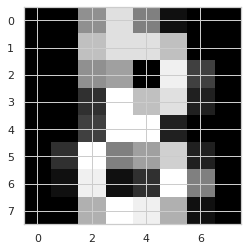

In [197]:
# Vemos la representación del a primera imagen
plt.imshow(image,cmap='gray')

## Split de datos en train y test

Al hacer un split de datos en train y test, separamos nuestro conjunto de datos en dos partes: 

- **train:** para entrenar el modelo.
- **test:**  para evaluar el desempeño del modelo. 

Esto nos permite evaluar la capacidad de nuestro modelo para generalizar a datos nuevos y no vistos durante el entrenamiento.

In [198]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

In [199]:
print(f"""X_train: {X_train.shape}
y_train: {y_train.shape}

X_test: {X_test.shape}
y_test: {y_test.shape}""")

X_train: (1437, 64)
y_train: (1437,)

X_test: (360, 64)
y_test: (360,)


### Entrenamiento de modelo

In [200]:
# Instanciamos y ajustamos el modelo de regresión logística
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

LogisticRegression()

In [201]:
pred = logistic_reg.predict(X_test)

## Evaluación del modelo

96.66666666666667


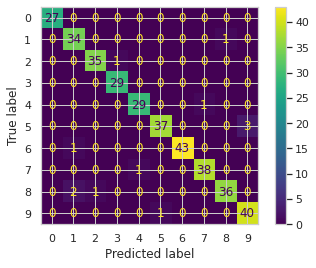

In [202]:
# ignorar las advertencias de FutureWarning.
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

plot_confusion_matrix(logistic_reg,X_test, y_test);
print(accuracy_score(y_test,pred)*100)

En nuestra evaluación del modelo logístico, obtuvimos una alta precisión y la mayoría de las predicciones fueron correctas. 

Nuestro modelo obtuvo un accuracy_score del 96.6%, lo que indica que es capaz de predecir correctamente la categoría del número en la mayoría de las veces.

### Carguemos nuestros propios números

Implementaremos un código que permitirá cargar imágenes hechas a mano y utilizar el modelo de regresión logística previamente entrenado para predecir qué dígito corresponde a cada imagen. Luego, se visualizará cada imagen con su respectiva predicción.

Si deseas replicarlo puedes probar con tus propias imagenes y ver si predice bien o no las imagenes.

In [203]:
from PIL import Image # Importamos la librería PIL para trabajar con imágenes
import numpy as np # Importamos numpy para manejar los datos de las imágenes

def classify(img_path):
  image_raw = Image.open(img_path).convert('L') # Abrimos la imagen y la convertimos a escala de grises
  image_procesed = image_raw.resize((8,8)) # Redimensionamos la imagen a una de 8x8 pixeles
  image_procesed = [np.array(image_procesed).flatten()] # Aplanamos la imagen y la convertimos a un arreglo numpy
  prediction = logistic_reg.predict(image_procesed)[0] # Predecimos con el modelo previamente entrenado
  return image_raw, prediction

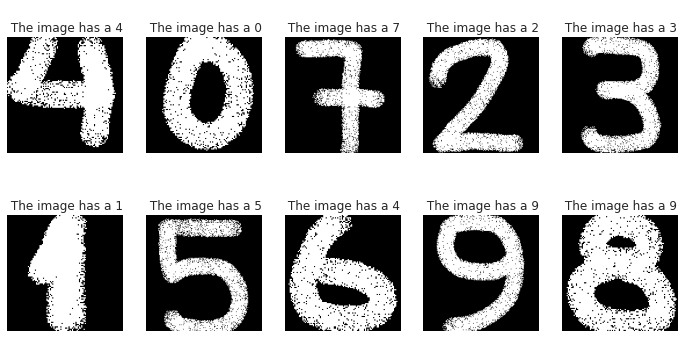

In [204]:
import matplotlib.pyplot as plt
import os

path = './handmade_digits'
files = os.listdir(path)

fig, ax = plt.subplots(2, 5, figsize=(12,6))

for i in range(2):
    for j in range(5):
        img,pred, = classify(f'./handmade_digits/{files[i*5+j]}')
        ax[i, j].imshow(img, cmap='gray')
        ax[i, j].axis('off')
        ax[i, j].set_title(f'\n The image has a {pred}')

Después de cargar nuestros propios números y probarlos con el modelo de regresión logística, se obtuvo una predicción correcta para la mayoría de las imágenes. Sin embargo, el número 8 fue confundido con un 9 y el número 6 fue confundido con un 4.

## ¿Cuándo usar regresión logística?


La regresión logística es un modelo estadístico utilizado para analizar la relación entre una variable dependiente categórica y una o más variables independientes. 

### Ventajas

- **Fácil de implementar:** La regresión logística es relativamente fácil de implementar, se puede ajustar a los datos utilizando sklearn como vimos anteriormente. Además, se puede utilizar en conjunción con otros métodos de análisis, como análisis de regresión, análisis discriminante y análisis de supervivencia.

- **Coeficientes interpretables:** Los coeficientes de la regresión logística son fácilmente interpretables y proporcionan información sobre la relación entre las variables independientes y la variable dependiente. Esto permite identificar qué variables tienen un efecto significativo en la variable dependiente y cómo afectan a las probabilidades de una observación de pertenecer a una clase específica.

- **Inferencia de la importancia de cada característica:** Puede proporcionar información sobre la importancia relativa de cada feature en la predicción de la variable dependiente. Esto es útil en la selección de características para modelos predictivos, ya que permite a los investigadores centrarse en las variables más importantes y descartar las menos importantes.

- **Clasificación en porcentajes:** Se puede utilizar para predecir la probabilidad de una observación de pertenecer a una clase específica. Estas probabilidades se pueden convertir en una clasificación binaria utilizando un umbral de probabilidad, por ejemplo decir que con un 80% de certeza la clasificacion es 1

- **excelentes resultados con conjuntos de datos linealmente separables:** Si las dos clases están linealmente separadas, entonces la regresión logística puede encontrar una línea recta o un hiperplano que separe las dos clases y proporcionar una clasificación precisa.

### Desventajas

- **Asume linealidad entre las variables dependientes:** La regresión logística asume una relación lineal entre las variables independientes y la variable dependiente. Si la relación no es lineal, puede proporcionar estimaciones incorrectas y, por lo tanto, puede no ser el modelo adecuado para el análisis.

- **Overfitting sobre datasets de alta dimensionalidad:** Puede ser susceptible al overfitting en conjuntos de datos de alta dimensionalidad, es decir, puede ajustarse demasiado a los datos y producir modelos que no generalizan bien a nuevos datos.

- **Le afecta la multicolinealidad de variables:** La multicolinealidad se refiere a la alta correlación entre dos o más variables independientes. La regresión logística puede verse afectada por la multicolinealidad, lo que puede hacer que las estimaciones de los coeficientes de la regresión sean imprecisas.

- **Mejores resultados con datasets grandes:** La regresión logística puede proporcionar resultados más precisos y robustos cuando se aplica a conjuntos de datos grandes en lugar de pequeños. Esto se debe a que, en general, cuantas más observaciones haya en el conjunto de datos, más precisas serán las estimaciones de los parámetros del modelo.



### Cuando usarla?

- **Probabilidad de ocurrencia sobre un evento categórico:** Cuando se trata de analizar datos en los que se desea modelar la probabilidad de ocurrencia de un evento categórico, como si un cliente comprará o no un producto o si un paciente tiene una enfermedad o no.

- **Datasets linealmente separables:** Si los datos se pueden separar en dos grupos mediante una línea recta o hiperplano, entonces la regresión logística puede proporcionar una clasificación precisa y rápida.

- **Datasets grandes:** La regresión logística es adecuada para conjuntos de datos grandes y complejos debido a su rapidez y eficiencia. La regresión logística puede manejar grandes cantidades de datos y proporcionar resultados precisos y confiables.

- **Datasets balanceados:** La regresión logística es adecuada para conjuntos de datos balanceados, lo que significa que hay aproximadamente el mismo número de observaciones en cada categoría de la variable dependiente. Esto se debe a que la regresión logística se basa en el principio de máxima verosimilitud, que asume que las categorías en la variable dependiente son igualmente probables.

## Fórmula de regresión logística

La fórmula de la regresión logística es una expresión matemática que **describe la relación entre las variables predictoras y la probabilidad de que ocurra un evento binario**. La fórmula se escribe como:


$\displaystyle P(y=1|x_1,x_2,\cdots,x_n) = \frac{1}{1 + e^{\displaystyle-(b0 + b1x1 + b2x2 + ... + bnxn)}}$

donde:

- **p**: es la probabilidad del evento binario (por ejemplo, la probabilidad de éxito en una prueba)
- **e**: es la constante matemática e (2.71828...)
- **b0**: es la constante de intercepción (también llamada término de sesgo)
- **b1, b2, ..., bn**: son los coeficientes de las variables predictoras x1, x2, ..., xn

La ecuación de regresión logística **se basa en el modelo de odds** (razón de probabilidad), que **se define como la probabilidad de que un evento ocurra dividida por la probabilidad de que no ocurra.** En el caso de un evento binario, la odds se expresa como:

$\displaystyle odds = \frac{p}{(1 - p)}$

donde **p es la probabilidad del evento**. La odds puede tomar valores desde cero (cuando la probabilidad es cero) hasta infinito (cuando la probabilidad es uno).

La ecuación de regresión logística utiliza la **transformación logarítmica de la odds**, que se expresa como:

$\log(odds) = b0 + b1x1 + b2x2 + ... + bnxn$

Esta ecuación es equivalente a la ecuación de la regresión logística, ya que la transformación exponencial de la ecuación de odds da como resultado la ecuación de la regresión logística.

formula de la regresion logistica con los odds:

$\displaystyle p = \frac{1}{1 + e^{-\log(\frac{p}{1-p})}}$


**Para estimar los valores de los coeficientes b0, b1, ..., bn, se utiliza el método de máxima verosimilitud**. 



## Estimación  de maxima verosimilitud (Maximum Likelihood Estimation)

**MLE (Maximum Likelihood Estimation) es un método de estimación utilizado en la regresión logística para encontrar los valores de los parámetros que maximizan la probabilidad de que los datos observados sean generados por un modelo específico.** En la regresión logística, se utiliza el MLE para encontrar los valores de los coeficientes que describen la relación entre una variable dependiente binaria y una o más variables independientes continuas o categóricas.

El modelo de regresión logística utiliza la función logística para modelar la probabilidad de que la variable dependiente tome un valor de 1 en términos de las variables independientes:

$\displaystyle P(y=1|x_1,x_2,\cdots,x_n) = \frac{1}{1 + e^{\displaystyle-(b0 + b1x1 + b2x2 + ... + bnxn)}}$

Donde $y$ es la variable dependiente binaria, $x_1, x_2, ..., x_n$ son las variables independientes, $\beta_0, \beta_1, \beta_2, ..., \beta_n$ son los coeficientes desconocidos que deben ser estimados y $e$ es la base del logaritmo natural.

El objetivo de MLE en la regresión logística es encontrar los valores de los coeficientes $\beta_0, \beta_1, \beta_2, ..., \beta_n$ que maximizan la probabilidad de observar los datos dados los valores de las variables independientes. La función de verosimilitud se define como:

$\displaystyle L(\beta 0 + \beta 1 + \beta 2 + ... + \beta n) = \prod_{i=1}^{N}[P(y=1|x_1,x_2,\cdots,x_n)]^{y_i}*[1-P(y=1|x_1,x_2,\cdots,x_n)]$

Donde $N$ es el número de observaciones en los datos de entrenamiento y $y_i$ es la variable dependiente para la i-ésima observación. La función de verosimilitud mide la probabilidad conjunta de observar los valores de $y_1, y_2, ..., y_N$ dados los valores de $x_{i1}, x_{i2}, ..., x_{in}$ y los coeficientes $\beta_0, \beta_1, \beta_2, ..., \beta_n$.

La función de verosimilitud puede ser difícil de maximizar directamente debido a su forma. Por lo tanto, se utiliza el logaritmo natural de la función de verosimilitud, llamado log-verosimilitud, para simplificar la maximización:


La función de log-verosimilitud se define como:

$\log loss =\displaystyle \frac{1}{N} \sum \limits_{i=1}^N - (y_i*log(P_i)+(1-y_i)*log(1-P_i))$

donde:

- $P_i$: Probabilidad de la clase 1
- $1- P_i$: Probabilidad de la clase 0


| Predicted probabilities    | Actual Class $(y_i)$ | $y_i*log(p_i)$       | $(1-y_i)*log(1-p_i)$ | $y_i*log(p_i)+(1-y_i)*log(1-p_i)$ |
|-------------------------   |---------------|----------------      |----------------------|-----------------------------------|
| 0.8                        | Positive (=1) | $1*\log 0.8=-0.2231$ | $0*\log 0.2=0$       | -0.2231                           |
| 0.15                       | Positive (=1) | $1*\log 0.15=-1.8971$| $0*\log 0.85=0$      | -1.8971                           |
| 0.95                       | Negative (=0) | $0*\log 0.95=0$      | $0*\log 0.05=-2.9957$| -2.9957                           |

### Contenido práctico:

#### [1. Logistic Regression Cost Function | Machine Learning | Simply Explained](https://www.youtube.com/watch?v=ar8mUO3d05w)
#### [2. Logistic Regression Gradient Descent | Derivation | Machine Learning](https://www.youtube.com/watch?v=t6MVuMavbBY)
#### [3. Derivative of Cost function for Logistic Regression | Machine Learning](https://www.youtube.com/watch?v=t6MVuMavbBY)

# Proyecto de regresión logística binomial

[Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

En este proyecto, trabajaremos con el dataset ["Telco Customer Churn"](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) para aplicar la regresión logística binomial y **predecir el abandono de clientes en una compañía de telecomunicaciones**.

Para ello, utilizaremos diferentes técnicas como la **preparación de datos**, **análisis exploratorio de los datos**, **aplicaremos el modelo de regresión logística construido** y finalmente **interpretaremos los resultados** obtenidos para comprender el churn de la empresa.

## Conociendo nuestro dataset

**El dataset "Telco Customer Churn" contiene 7043 registros y 21 atributos.** Estos atributos incluyen información demográfica de los clientes, servicios contratados, información de facturación y la variable objetivo "Churn", que indica si el cliente ha abandonado o no la compañía de telecomunicaciones.


### Atributos:


1. **CustomerID:** identificador único del cliente.

1. **gender:** género del cliente.

1. **SeniorCitizen:** variable binaria que indica si el cliente es mayor de 65 años.

1. **Partner:** variable binaria que indica si el cliente tiene pareja.

1. **Dependents:** variable binaria que indica si el cliente tiene dependientes.

1. **Tenure:** cantidad de meses que el cliente ha estado en la compañía.

1. **PhoneService:** variable binaria que indica si el cliente tiene servicio telefónico.

1. **MultipleLines:** variable categórica que indica si el cliente tiene una o múltiples líneas telefónicas.

1. **InternetService:** variable categórica que indica si el cliente tiene servicio de internet y el tipo de conexión (DSL, fibra óptica o sin conexión).

1. **OnlineSecurity:** variable categórica que indica si el cliente tiene servicio de seguridad en línea.

1. **OnlineBackup:** variable categórica que indica si el cliente tiene servicio de respaldo en línea.

1. **DeviceProtection:** variable categórica que indica si el cliente tiene servicio de protección de dispositivos.

1. **TechSupport:** variable categórica que indica si el cliente tiene servicio de soporte técnico.

1. **StreamingTV:** variable categórica que indica si el cliente tiene servicio de televisión por streaming.

1. **StreamingMovies:** variable categórica que indica si el cliente tiene servicio de películas por streaming.

1. **Contract:** variable categórica que indica el tipo de contrato del cliente (mes a mes, anual o bianual).

1. **PaperlessBilling:** variable binaria que indica si el cliente recibe facturas en línea o por correo.

1. **PaymentMethod:** variable categórica que indica el método de pago del cliente.

1. **MonthlyCharges:** cantidad mensual de dinero que el cliente paga a la compañía.

1. **TotalCharges:** cantidad total de dinero que el cliente ha pagado a la compañía hasta el momento.

1. **Churn:** variable binaria que toma el valor de "Yes" si el cliente ha cancelado su contrato y "No" si el cliente aún sigue siendo cliente de la compañía.


### Importar librerías

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

### Carga de datos


In [206]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## Data pre-processing

En el siguiente preprocesamiento de datos:

- eliminaremos duplicados 
- evaluaremos valores nulos 
- removeremos columnas innecesarias 
- procesaremos los datos categóricos 
- eliminaremos los outliers 
- escalaremos la data para su mejor uso en el modelo.





### Dataset information

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Cambiar total_charges a numeric

la columna "TotalCharges" se encuentra en formato de object, cuando debería estar en formato float64 al igual que la columna "MonthlyCharges". Es necesario convertir esta columna a formato numérico para su análisis.

In [208]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Después de convertir la columna "TotalCharges" del dataset a formato numérico, nos encontramos con valores faltantes. Ahora debemos decidir cómo tratar estos datos faltantes antes de continuar con el análisis.

### Manejo de datos nulos

In [210]:
print(f'''
{'='*52}
DATOS FALTANTES EN TODAS LAS COLUMNAS.
{'='*52}
{df.isnull().sum()}
{'='*52}
PROPORCIÓN DE DATOS FALTANTES EN TOTALCHARGES: {((df.isnull().sum()['TotalCharges']/df.count()['TotalCharges'])*100).round(3)}%
{'='*52}''')




DATOS FALTANTES EN TODAS LAS COLUMNAS.
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
PROPORCIÓN DE DATOS FALTANTES EN TOTALCHARGES: 0.156%


Los valores faltantes representan menos del 0.157% de los datos, por lo que se optó por eliminarlos del conjunto de datos.

In [211]:
df.dropna(inplace=True)

In [212]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Eliminar id

Eliminaremos la columna "customerID" del conjunto de datos ya que es simplemente un identificador único para cada cliente y no tiene relación con las variables que influyen en la decisión de un cliente de cancelar o no su servicio.

In [213]:
df.drop('customerID',axis=1, inplace=True)

In [214]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

### Convertir a numerico la variable objetivo

Convertiremos las variables de la columna "Churn" a valores numéricos (0 o 1) ya que nuestro modelo de regresión logística requiere variables de entrada numéricas para predecir la probabilidad de churn.

In [215]:
df.Churn.replace(to_replace=['Yes','No'], value=[1,0], inplace=True)

In [216]:
df_processing = df.copy()

### Manejo de variables categóricas 

Manejaremos las variables categóricas a numéricas con un One Hot Encoding para poder trabajar mejor con los algoritmos de machine learning.

In [217]:
df_processing = pd.get_dummies(df_processing)
df_processing.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0              1   
1              0      34           56.95       1889.50      0              0   
2              0       2           53.85        108.15      1              0   
3              0      45           42.30       1840.75      0              0   
4              0       2           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0            0           0            1              1  ...   
1            1           1            0              1  ...   
2            1           1            0              1  ...   
3            1           1            0              1  ...   
4            0           1            0              1  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 46 columns]

### Análisis de correlación

<AxesSubplot: xlabel='Churn', ylabel='index'>

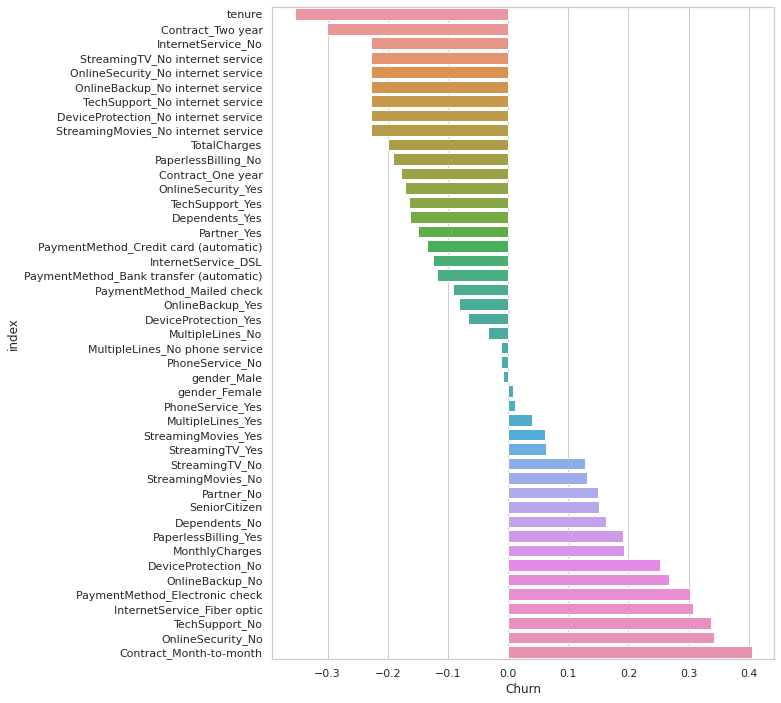

In [218]:
plt.figure(figsize=(9,12))
corr = df_processing.corr()['Churn'].sort_values(ascending=True).reset_index()[0:45]
sns.barplot(data=corr, x='Churn',y='index')

### Insight

- La correlación más fuerte con la variable objetivo (Churn) es la duración del contrato (Contract). **Los contratos a corto plazo tienen una correlación positiva** con la variable Churn, lo que sugiere que los clientes con contratos a corto plazo son más propensos a darse de baja. Por otro lado, **los contratos a largo plazo tienen una correlación negativa** con Churn, lo que sugiere que los clientes con contratos a largo plazo son menos propensos a darse de baja.

- **Los clientes con servicios adicionales, como múltiples líneas telefónicas o servicios de streaming de TV y películas, tienen una correlación** negativa con Churn, lo que sugiere que estos servicios pueden aumentar la satisfacción del cliente y reducir la probabilidad de darse de baja. Por otro lado, **aquellos clientes que no cuentan con estos servicios presentaron una correlación positiva** con la variable objetivo (Churn), lo que sugiere que estos clientes son más propensos a darse de baja.

- Los clientes con **facturación electrónica tienen una correlación negativa** con Churn, lo que sugiere que esta opción puede hacer que sea más fácil para los clientes mantenerse al día con los pagos y reducir la probabilidad de darse de baja.

### Escalabilidad de datos

Escalaremos los datos debido a las diferencias de pesos entre las variables, como la edad, el pago mensual y el pago anual, para que no influyan más las variables con valores más grandes y las más pequeñas sean ignoradas.

In [219]:
from sklearn.preprocessing import MinMaxScaler

In [220]:
scaler = MinMaxScaler()
df_processing_scaled = scaler.fit_transform(df_processing)

In [221]:
df_processing_scaled

array([[0.        , 0.        , 0.11542289, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.46478873, 0.38507463, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.01408451, 0.35422886, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.14084507, 0.11293532, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.04225352, 0.55870647, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.91549296, 0.86965174, ..., 0.        , 0.        ,
        0.        ]])

In [222]:
df_processing_scaled = pd.DataFrame(df_processing_scaled)

In [223]:
df_processing_scaled.columns = df_processing.columns

In [224]:
df_processing_scaled

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn  \
0               0.0  0.000000        0.115423      0.001275    0.0   
1               0.0  0.464789        0.385075      0.215867    0.0   
2               0.0  0.014085        0.354229      0.010310    1.0   
3               0.0  0.619718        0.239303      0.210241    0.0   
4               0.0  0.014085        0.521891      0.015330    1.0   
...             ...       ...             ...           ...    ...   
7027            0.0  0.323944        0.662189      0.227521    0.0   
7028            0.0  1.000000        0.845274      0.847461    0.0   
7029            0.0  0.140845        0.112935      0.037809    0.0   
7030            1.0  0.042254        0.558706      0.033210    1.0   
7031            0.0  0.915493        0.869652      0.787641    0.0   

      gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0               1.0          0.0         0.0          1.0            1.0  ...   
1               0.0          1.0         1.0          0.0            1.0  ...   
2               0.0          1.0         1.0          0.0            1.0  ...   
3               0.0          1.0         1.0          0.0            1.0  ...   
4               1.0          0.0         1.0          0.0            1.0  ...   
...             ...          ...         ...          ...            ...  ...   
7027            0.0          1.0         0.0          1.0            0.0  ...   
7028            1.0          0.0         0.0          1.0            0.0  ...   
7029            1.0          0.0         0.0          1.0            0.0  ...   
7030            0.0          1.0         0.0          1.0            1.0  ...   
7031            0.0          1.0         1.0          0.0            1.0  ...   

      StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                     0.0                      1.0                0.0   
1                     0.0                      0.0                1.0   
2                     0.0                      1.0                0.0   
3                     0.0                      0.0                1.0   
4                     0.0                      1.0                0.0   
...                   ...                      ...                ...   
7027                  1.0                      0.0                1.0   
7028                  1.0                      0.0                1.0   
7029                  0.0                      1.0                0.0   
7030                  0.0                      1.0                0.0   
7031                  1.0                      0.0                0.0   

      Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                   0.0                  0.0                   1.0   
1                   0.0                  1.0                   0.0   
2                   0.0                  0.0                   1.0   
3                   0.0                  1.0                   0.0   
4                   0.0                  0.0                   1.0   
...                 ...                  ...                   ...   
7027                0.0                  0.0                   1.0   
7028                0.0                  0.0                   1.0   
7029                0.0                  0.0                   1.0   
7030                0.0                  0.0                   1.0   
7031                1.0                  0.0                   1.0   

      PaymentMethod_Bank transfer (automatic)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         1.0   
4                                         0.0   
...                                       ...   
7027                                      0.0   
7028                                      0.0   
7029                             

## Análisis exploratorio de datos

Realizaremos un análisis exploratorio de datos (EDA) que incluirá tanto el análisis de las variables categóricas como el de las variables numéricas del conjunto de datos teniendo en cuenta la variable objetivo (Churn).

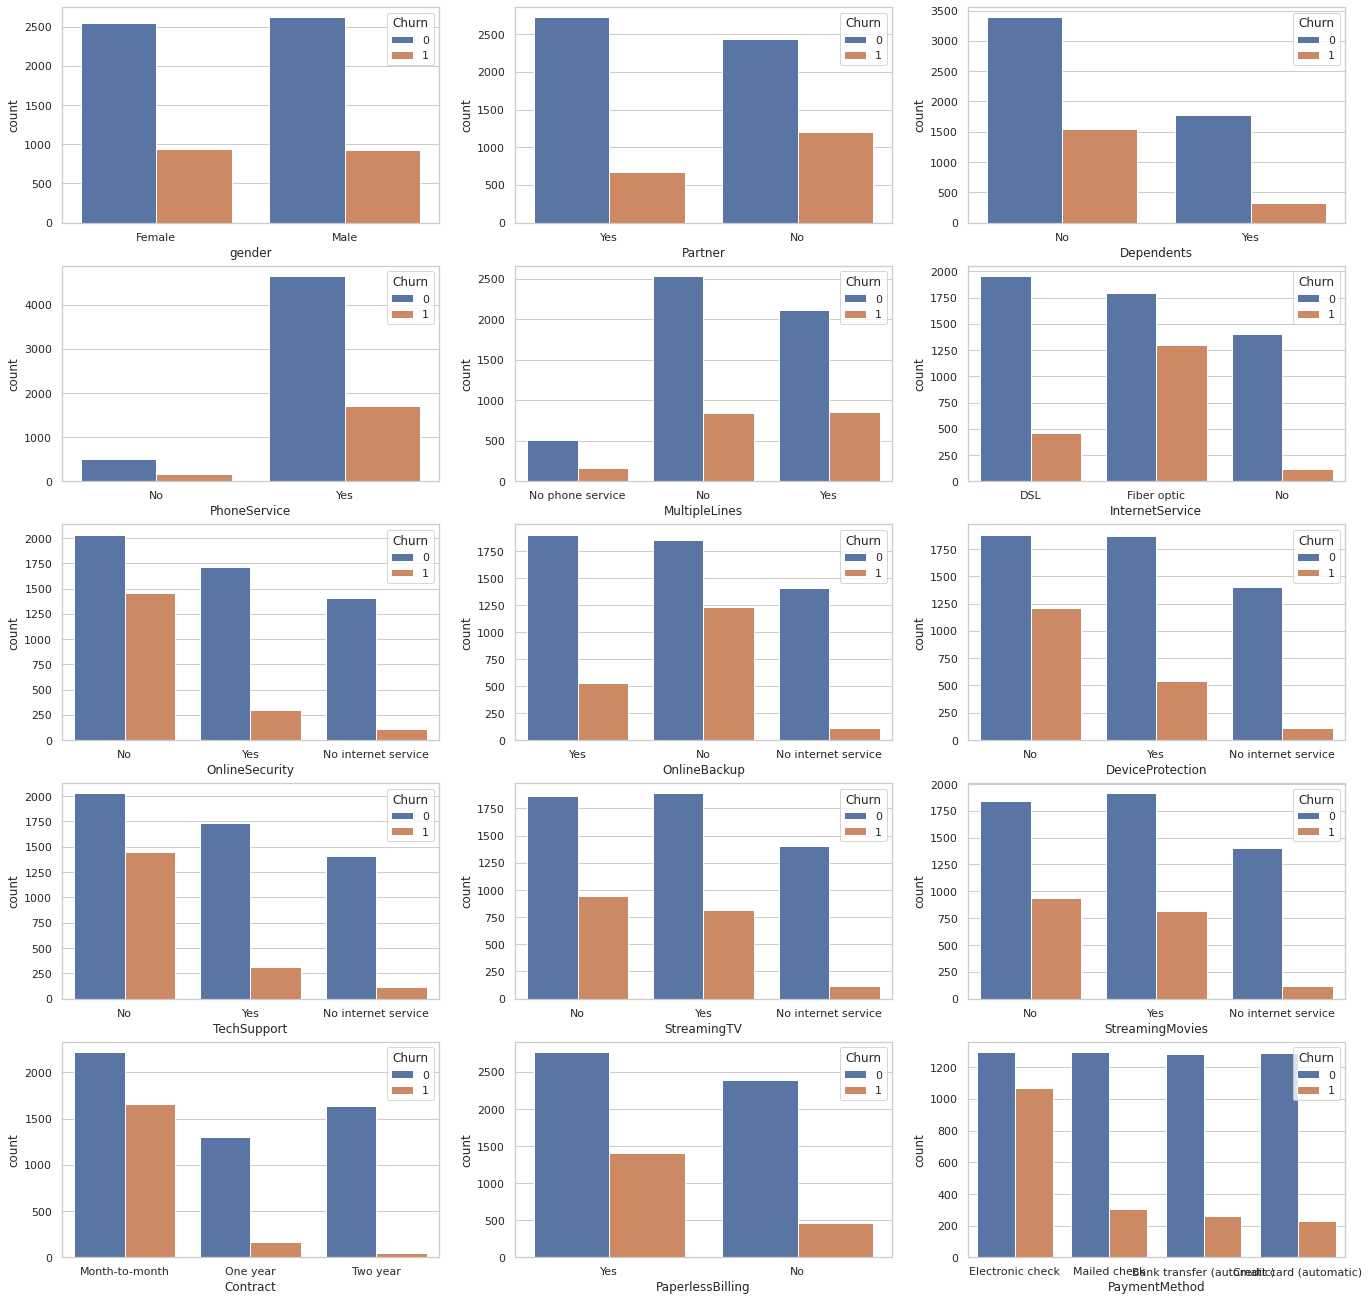

In [225]:
columns_cat = df.select_dtypes(include='object').columns

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(23, 23))

for var, ax in zip(columns_cat, axs.flatten()):
    sns.countplot(data=df, x=var,hue='Churn', ax=ax)

### Insight

- La variable "gender" no parece tener una correlación significativa con la tasa de churn.

- Los clientes con "Partner" (pareja) y "Dependents" (dependientes) tienen menos probabilidades de darse de baja.

- Los clientes que tienen "PhoneService" (servicio telefónico) y "MultipleLines" (múltiples líneas telefónicas) tienen menos probabilidades de darse de baja.

- Los clientes que tienen fibra optica en "InternetService" (servicio de internet) tienen una alta tasa de churn en comparacion de los que tienen DSL y no tienen.

- Los clientes que no tienen "OnlineSecurity" (seguridad en línea), "OnlineBackup" (respaldo en línea), "DeviceProtection" (protección de dispositivo) y "TechSupport" (soporte técnico) tienen una alta tasa de churn.

- Los clientes que utilizan servicios de "StreamingTV" (televisión por streaming) y "StreamingMovies" (películas por streaming) parecen tener una correlación positiva con la tasa de churn.

- Los clientes con contratos a corto plazo (mes a mes) tienen una alta tasa de churn en comparación con aquellos con contratos a largo plazo.

- Los clientes que utilizan "PaperlessBilling" (facturación sin papel) tienen una alta tasa de churn.

- Los clientes que utilizan "Electronic check" (cheques electrónicos) como método de pago tienen una alta tasa de churn en comparación con otros métodos de pago.

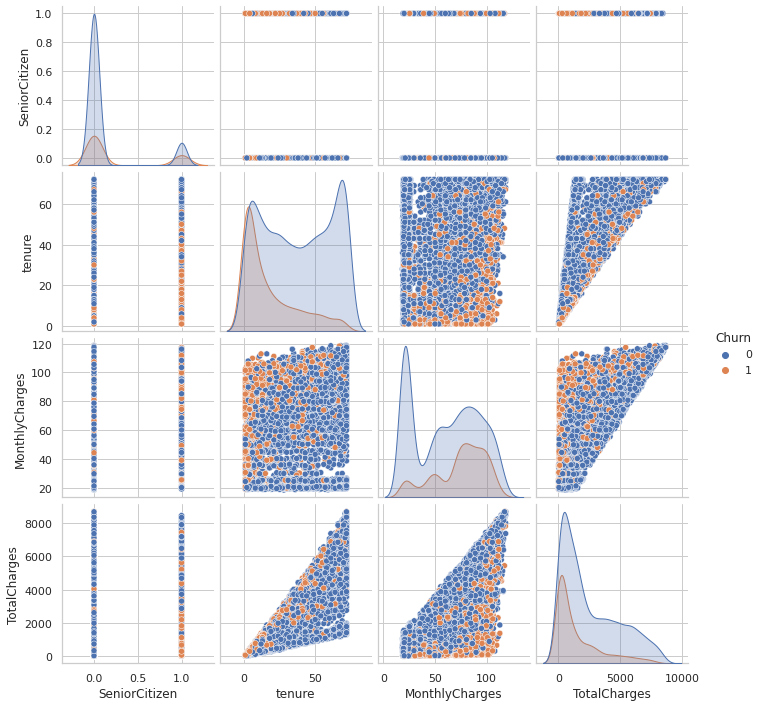

In [226]:
sns.pairplot(data=df, hue='Churn')

### Insight
- se puede observar que la combinación de una factura elevada en un período corto de tiempo (por ejemplo, en el primer o segundo mes) parece estar fuertemente asociada con la cancelación de servicios (churn) por parte del cliente. Esto sugiere que los clientes son más sensibles a los precios y están dispuestos a cancelar sus servicios si sienten que están pagando demasiado en un corto período de tiempo.

## Entrenamiento con regresión logística binomial

In [227]:
X = df_processing_scaled.drop('Churn', axis=1)
y = df_processing_scaled['Churn'].values

In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [229]:
print(f"""X_train:{X_train.shape}
X_test:{X_test.shape}

y_train:{y_train.shape}
y_test:{y_test.shape}""")

X_train:(4922, 45)
X_test:(2110, 45)

y_train:(4922,)
y_test:(2110,)


In [230]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train,y_train)

In [234]:
from sklearn import metrics
pred_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, pred_test))

0.795734597156398


## Evaluando el modelo

<AxesSubplot: title={'center': 'Los 10 factores principales que retienen a los clientes'}>

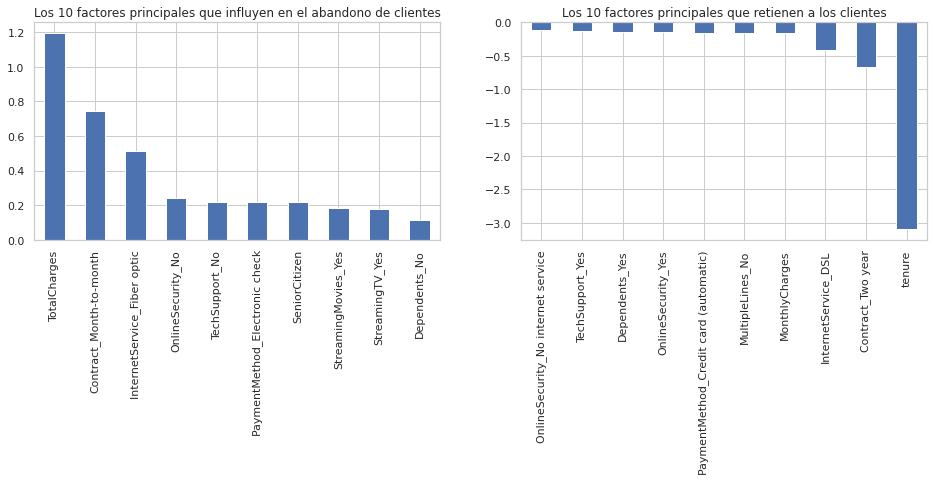

In [231]:
weights = pd.Series(model.coef_[0], index=X.columns.values)

fig,axs = plt.subplots(1,2,figsize=(16,4))

weights.sort_values(ascending=False).head(10).plot(kind='bar',ax=axs[0],title='Los 10 factores principales que influyen en el abandono de clientes')
weights.sort_values(ascending=False).tail(10).plot(kind='bar',ax=axs[1],title='Los 10 factores principales que retienen a los clientes')

In [232]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


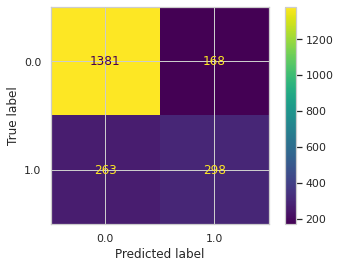

In [235]:
cm = confusion_matrix(y_test,pred_test,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

# Regresión logística multinomial

## Cómo funciona la regresión logística multiclase

Recordando lo aprendido la regresión logística binomial es un tipo de regresión logística que se utiliza cuando la variable a predecir tiene solo dos posibles valores. Por ejemplo, si se quisiera predecir si una persona comprará o no un producto, la regresión logística binomial podría ser útil.

Por otro lado, **la regresión logística multiclase** es un tipo de regresión logística que **se utiliza cuando la variable a predecir tiene más de dos posibles valores**. Por ejemplo, si se quisiera predecir el tipo de flor (rosa, margarita, lirio, etc.) a partir de sus características, la regresión logística multiclase podría ser útil.

### One-vs-Rest

[**One-vs-Rest**](https://www.youtube.com/watch?v=EYXSve6T5BU) es una técnica utilizada en la clasificación multiclase que **consiste en entrenar múltiples modelos de clasificación binaria** en lugar de un solo modelo de clasificación multiclase.

La idea es simple: para un problema de clasificación multiclase con k clases, se entrenan k modelos binarios diferentes. En cada modelo, se trata a una de las k clases como "positiva" y se agrupan las restantes k-1 clases como "negativas". Por lo tanto, se entrena un modelo para cada clase y se compara su salida con la de las demás.

<img src='https://i.ytimg.com/vi/EYXSve6T5BU/maxresdefault.jpg' width=600>

En la fase de predicción, se aplica cada uno de los k modelos binarios al ejemplo que se desea clasificar y se elige la clase para la cual el modelo binario correspondiente ha dado la mayor probabilidad o puntuación de pertenencia. En otras palabras, el modelo que da la probabilidad más alta para una clase determinada predice que la clase es positiva, mientras que los demás modelos predicen que la clase es negativa. Luego, se elige la clase con la probabilidad más alta.

### Multinominal Logistic Regression

El clasificador de regresión logística multinomial se puede entender como un modelo de regresión lineal con una función de activación softmax y una función de pérdida de entropía cruzada.

En términos más simples, el clasificador utiliza una función matemática lineal para asignar pesos a cada variable independiente y predecir la probabilidad de pertenencia a cada una de las clases posibles. 

| Inputs (X) |              | Logits (Y) |
|------------|--------------|------------|
| $x1$       | $w*x+b$      | $0.5$      |
| $x2$       | Linear model | $1.5$      |
| $x3$       |              | $0.1$      |

La función softmax se utiliza para normalizar las probabilidades y asegurarse de que sumen 1. Por lo tanto, las probabilidades predicen la probabilidad de pertenencia a cada clase posible, dadas las variables independientes.

| Logits (Y) |         | S(Y) |
|------------|---------|------|
| $0.5$      | S(Y)    | $0.2$|
| $1.5$      | Softmax | $0.7$|
| $0.1$      |         | $0.1$|

La función de pérdida de entropía cruzada se utiliza para medir el error del modelo en la predicción de la clase correcta. Esta función de pérdida es importante porque penaliza al modelo por predecir probabilidades incorrectas y alienta al modelo a ajustar sus pesos para mejorar la precisión de la predicción.


| S(Y) |               | One-hot encoding |
|------|---------------|------------------|
| $0.2$| D(S,L)        | $0$              |
| $0.7$| Cross Entropy | $1$              |
| $0.1$|               | $0$              |

Durante el entrenamiento, se ajustan los pesos del modelo para minimizar la función de pérdida de entropía cruzada. En otras palabras, el modelo trata de minimizar la diferencia entre la probabilidad real de pertenencia a una clase y la probabilidad predicha por el modelo.

| Inputs (X) |              | Logits (Y) |         | S(Y) |               | One-hot encoding |
|------------|--------------|------------|---------|------|---------------|------------------|
| $x1$       | $w*x+b$      | $0.5$      | S(Y)    | $0.2$| D(S,L)        | $0$              |
| $x2$       | Linear model | $1.5$      | Softmax | $0.7$| Cross Entropy | $1$              |
| $x3$       |              | $0.1$      |         | $0.1$|               | $0$              |



### Scikit-learn solvers

En Scikit-learn, los solvers se refieren a los algoritmos utilizados para resolver el problema de optimización que subyace en los modelos de aprendizaje supervisado.

En particular, **los solvers son los algoritmos que se utilizan para encontrar los valores óptimos de los pesos del modelo que minimizan la función de pérdida**. Por ejemplo, para problemas de regresión logística binaria, los solvers más comunes son "liblinear" y "sag" (Gradiente estocástico promedio). 

En general, la elección del solver depende del tipo de problema de aprendizaje supervisado y del conjunto de datos utilizado. Al elegir un solver, es importante considerar la eficiencia computacional y la capacidad de convergencia del algoritmo.


<img src='https://miro.medium.com/v2/resize:fit:1400/1*CjDp3YWQwh22dt3oiaAf7A.png' width=700>

# Proyecto de regresión logística multinomial  

**Data comes frome:** https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset

En este proyecto, trabajaremos con el dataset [**"Dry Bean Dataset"**](https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset): de Kaggle para aplicar la regresión logística multinomial y **predecir la variedad de frijol en función de características como la forma, tamaño y textura.

**Utilizaremos la regresión logística multinomial** que permite clasificar en más de dos categorías. Se aplicarán técnicas para **balancear los datos, preprocesamiento de datos, análisis exploratorio de los datos**, finalmente se **construirá un modelo de regresión logística multinomial y se evaluará su desempeño**.

## Conociendo nuestro dataset

**El dataset "Dry Bean Dataset" de Kaggle tiene un total de 13611 registros y 17 atributos**. A continuación, se enlistan los atributos:

### Atributos:

1. **Area (A):** El área de una zona de frijol y el número de píxeles dentro de sus límites.

1. **Perimeter (P):** La circunferencia del frijol se define como la longitud de su borde.

1. **Major axis length (L):** La distancia entre los extremos de la línea más larga que se puede dibujar desde un frijol.

1. **Minor axis length (l):** La línea más larga que se puede dibujar desde el frijol mientras se mantiene perpendicular al eje principal.

1. **Aspect ratio (K):** Define la relación entre L y l.

1. **Eccentricity (Ec):** Excentricidad de la elipse que tiene los mismos momentos que la región.

1. **Convex area (C):** Número de píxeles en el polígono convexo más pequeño que puede contener el área de una semilla de frijol.

1. **Equivalent diameter (Ed):** El diámetro de un círculo que tiene la misma área que el área de una semilla de frijol.

1. **Extent (Ex):** La relación entre los píxeles en el cuadro delimitador y el área del frijol.

1. **Solidity (S):** También conocida como convexidad. La relación entre los píxeles en la cáscara convexa y los que se encuentran en los frijoles.

1. **Roundness (R):** Se calcula con la siguiente fórmula: (4piA)/(P^2)

1. **Compactness (CO):** Mide la redondez de un objeto: Ed/L

1. **ShapeFactor1 (SF1)**

1. **ShapeFactor2 (SF2)**

1. **ShapeFactor3 (SF3)**

1. **ShapeFactor4 (SF4)**

1. **Class:** variedad de frijol a la que pertenece el objeto (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz y Sira)

## Importar librerías

In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

sns.set(style='whitegrid', context='notebook')

## Carga de datos

In [ ]:
df = pd.read_csv('Dry_Bean.csv')

In [ ]:
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653247  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

Verificamos si la variable objetivo tiene más de dos clases.

In [ ]:
df.Class.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
df.describe().T

count          mean           std           min  \
Area             13611.0  53048.284549  29324.095717  20420.000000   
Perimeter        13611.0    855.283459    214.289696    524.736000   
MajorAxisLength  13611.0    320.141867     85.694186    183.601165   
MinorAxisLength  13611.0    202.270714     44.970091    122.512653   
AspectRation     13611.0      1.583242      0.246678      1.024868   
Eccentricity     13611.0      0.750895      0.092002      0.218951   
ConvexArea       13611.0  53768.200206  29774.915817  20684.000000   
EquivDiameter    13611.0    253.064220     59.177120    161.243764   
Extent           13611.0      0.749733      0.049086      0.555315   
Solidity         13611.0      0.987143      0.004660      0.919246   
roundness        13611.0      0.873282      0.059520      0.489618   
Compactness      13611.0      0.799864      0.061713      0.640577   
ShapeFactor1     13611.0      0.006564      0.001128      0.002778   
ShapeFactor2     13611.0      0.001716      0.000596      0.000564   
ShapeFactor3     13611.0      0.643590      0.098996      0.410339   
ShapeFactor4     13611.0      0.995063      0.004366      0.947687   

                          25%           50%           75%            max  
Area             36328.000000  44652.000000  61332.000000  254616.000000  
Perimeter          703.523500    794.941000    977.213000    1985.370000  
MajorAxisLength    253.303633    296.883367    376.495012     738.860154  
MinorAxisLength    175.848170    192.431733    217.031741     460.198497  
AspectRation         1.432307      1.551124      1.707109       2.430306  
Eccentricity         0.715928      0.764441      0.810466       0.911423  
ConvexArea       36714.500000  45178.000000  62294.000000  263261.000000  
EquivDiameter      215.068003    238.438026    279.446467     569.374358  
Extent               0.718634      0.759859      0.786851       0.866195  
Solidity             0.985670      0.988283      0.990013       0.994677  
roundness            0.832096      0.883157      0.916869       0.990685  
Compactness          0.762469      0.801277      0.834270       0.987303  
ShapeFactor1         0.005900      0.006645      0.007271       0.010451  
ShapeFactor2         0.001154      0.001694      0.002170       0.003665  
ShapeFactor3         0.581359      0.642044      0.696006       0.974767  
ShapeFactor4         0.993703      0.996386      0.997883       0.999733

Al realizar un análisis visual del resultado de la función describe() del dataframe, no se detectan valores nulos o outliers evidentes.

## Data pre-processing

### Drop duplicates

In [ ]:
df.drop_duplicates(inplace=True)

### Manejo de datos nulos

In [ ]:
print(
    df.shape,
    df.isnull().sum(),
    sep='\n\n')

(13543, 17)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


Se han eliminado 68 valores duplicados y no hay valores nulos en el conjunto de datos, por lo que procederemos con el análisis.

### Undersampling

La regresión logística funciona mejor con datasets balanceados. Por lo tanto, en este análisis veremos la proporción de los datos para considerar si es necesario aplicar técnicas de balanceo de clases.

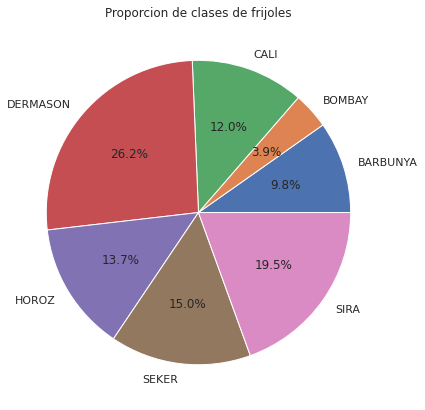

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


In [ ]:
plt.figure(figsize=(7,7))

labels, counts = np.unique(df.Class, return_counts=True)
plt.pie(counts, autopct='%1.1f%%',labels=labels)
plt.title('Proporcion de clases de frijoles')

plt.show()

print(df.Class.value_counts())

Se observa una desproporción en la distribución de los tipos de frijoles en el conjunto de datos. 

Los resultados muestran que **Dermason y Sira representan más del 45%** de las muestras totales, mientras que **Bombay tiene una representación del 3.85%**. 

**Se realizará un undersampling** en lugar de un oversampling. Esto se debe a que **un oversampling podría generar overfitting y una menor capacidad de generalización del modelo al duplicar o triplicar algunas muestras.** El undersampling equilibra las clases y mejora la capacidad de generalización del modelo.


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [ ]:
X = df.drop('Class',axis=1)
y = df.Class

In [ ]:
X_over, y_over = undersample.fit_resample(X,y)

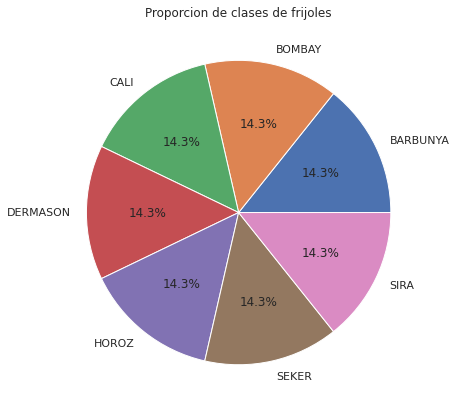

BARBUNYA    522
BOMBAY      522
CALI        522
DERMASON    522
HOROZ       522
SEKER       522
SIRA        522
Name: Class, dtype: int64


In [ ]:
plt.figure(figsize=(7,7))

labels, counts = np.unique(y_over, return_counts=True)
plt.pie(counts, autopct='%1.1f%%',labels=labels)
plt.title('Proporcion de clases de frijoles')

plt.show()

print(y_over.value_counts())

In [ ]:
df.shape

(13543, 17)

In [ ]:
X_over.shape

(3654, 16)

Se redujo significativamente el tamaño del conjunto de datos de 13543 a 3654 al realizar undersampling. A pesar de la pérdida de datos, esto evita el riesgo de generar datos no relevantes y garantiza que los datos utilizados en el análisis sean reales y significativos.

### Conversión a numéricos

In [ ]:
list(np.unique(y_over))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [ ]:
y_over.replace(
    ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
    [1,2,3,4,5,6,7],
    inplace=True)

In [ ]:
list(np.unique(y_over))

[1, 2, 3, 4, 5, 6, 7]

## Análisis exploratorio

### Correlación

Realizaremos un análisis de correlación para evitar la presencia de multicolinealidad en nuestro conjunto de datos.

In [ ]:
df_dea = X_over.copy(deep=True)
df_dea['Class'] = y_over

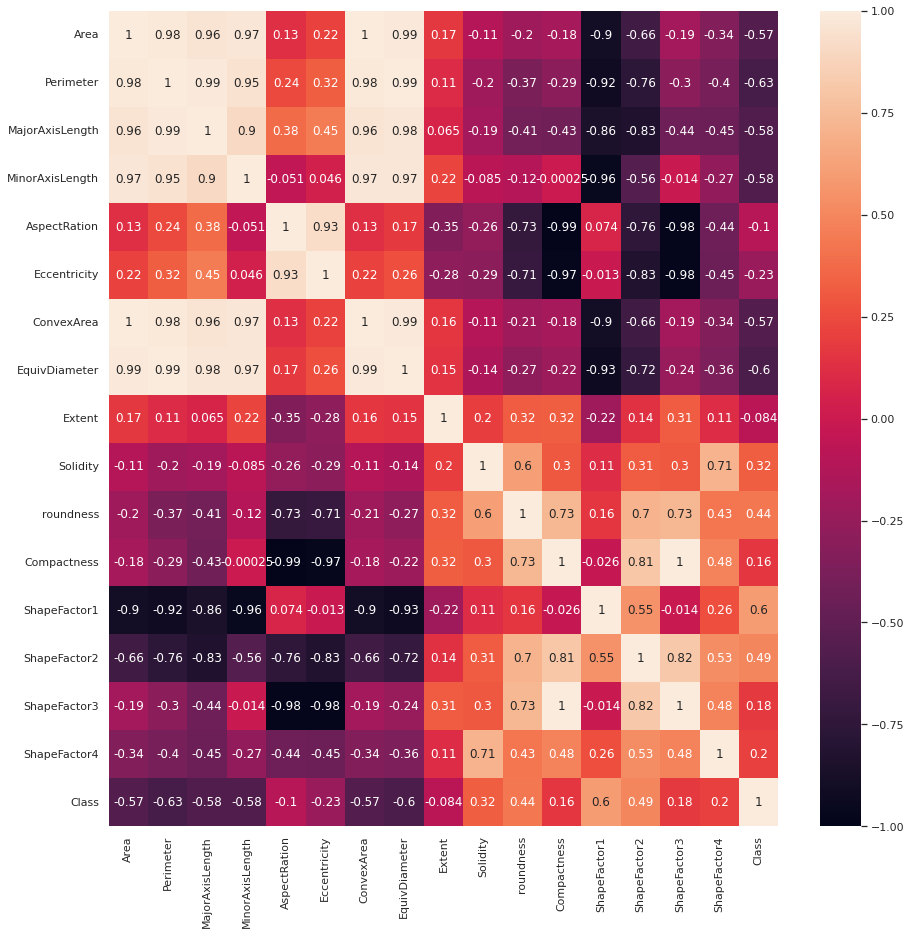

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_dea.corr(),annot=True,vmax=1,vmin=-1);

#### Insight

En el análisis de correlación, se observó en el heatmap que la variable **ConvexArea** presenta una alta correlación con la variable Area, en una relación de 1 a 1, y también se encuentra altamente correlacionada con el Perimeter, MajorAxisLenght y MinorAxisLenght.

Por otro lado, la variable **EquivDiameter** muestra una alta correlación con las variables Area, Perimeter, Width y Length. 


**Estas correlaciones indican la presencia de multicolinealidad entre estas variables**, por lo tanto, se procederá a dropear esas variables para evitar la multicolinealidad.

In [ ]:
X_over.drop(['ConvexArea','EquivDiameter'], inplace=True, axis=1)

In [89]:
X_over

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0     70776   1060.894       386.619944       234.100208      1.651515   
1     66370   1004.139       339.287072       249.883085      1.357783   
2     60736    985.501       342.445302       226.741775      1.510288   
3     65219   1011.110       353.650546       235.308999      1.502920   
4     51332    889.637       330.822804       198.618899      1.665616   
...     ...        ...              ...              ...           ...   
3649  44358    785.631       288.303275       196.970714      1.463686   
3650  37641    742.538       284.313737       169.740814      1.674987   
3651  40668    747.000       271.731569       191.687622      1.417575   
3652  53233    893.511       329.969126       206.375684      1.598876   
3653  49905    852.703       321.320571       199.684288      1.609143   

      Eccentricity    Extent  Solidity  roundness  Compactness  ShapeFactor1  \
0         0.795842  0.775763  0.983300   0.790227     0.776451      0.005463   
1         0.676443  0.720536  0.981268   0.827169     0.856789      0.005112   
2         0.749393  0.789353  0.984695   0.785854     0.812058      0.005638   
3         0.746512  0.719436  0.978207   0.801654     0.814831      0.005423   
4         0.799716  0.751688  0.981811   0.815028     0.772776      0.006445   
...            ...       ...       ...        ...          ...           ...   
3649      0.730225  0.791937  0.987973   0.903118     0.824312      0.006499   
3650      0.802227  0.744187  0.987642   0.857894     0.769995      0.007553   
3651      0.708780  0.712162  0.985724   0.915844     0.837416      0.006682   
3652      0.780273  0.689154  0.985395   0.837898     0.788991      0.006199   
3653      0.783455  0.759242  0.980625   0.862498     0.784492      0.006439   

      ShapeFactor2  ShapeFactor3  ShapeFactor4  
0         0.001225      0.602875      0.995658  
1         0.001699      0.734087      0.996731  
2         0.001512      0.659438      0.995941  
3         0.001475      0.663950      0.997864  
4         0.001418      0.597183      0.994678  
...            ...           ...           ...  
3649      0.001851      0.679490      0.994560  
3650      0.001638      0.592892      0.993087  
3651      0.002027      0.701266      0.994097  
3652      0.001482      0.622507      0.995312  
3653      0.001504      0.615428      0.990311  

[3654 rows x 14 columns]

### Visualización de datos

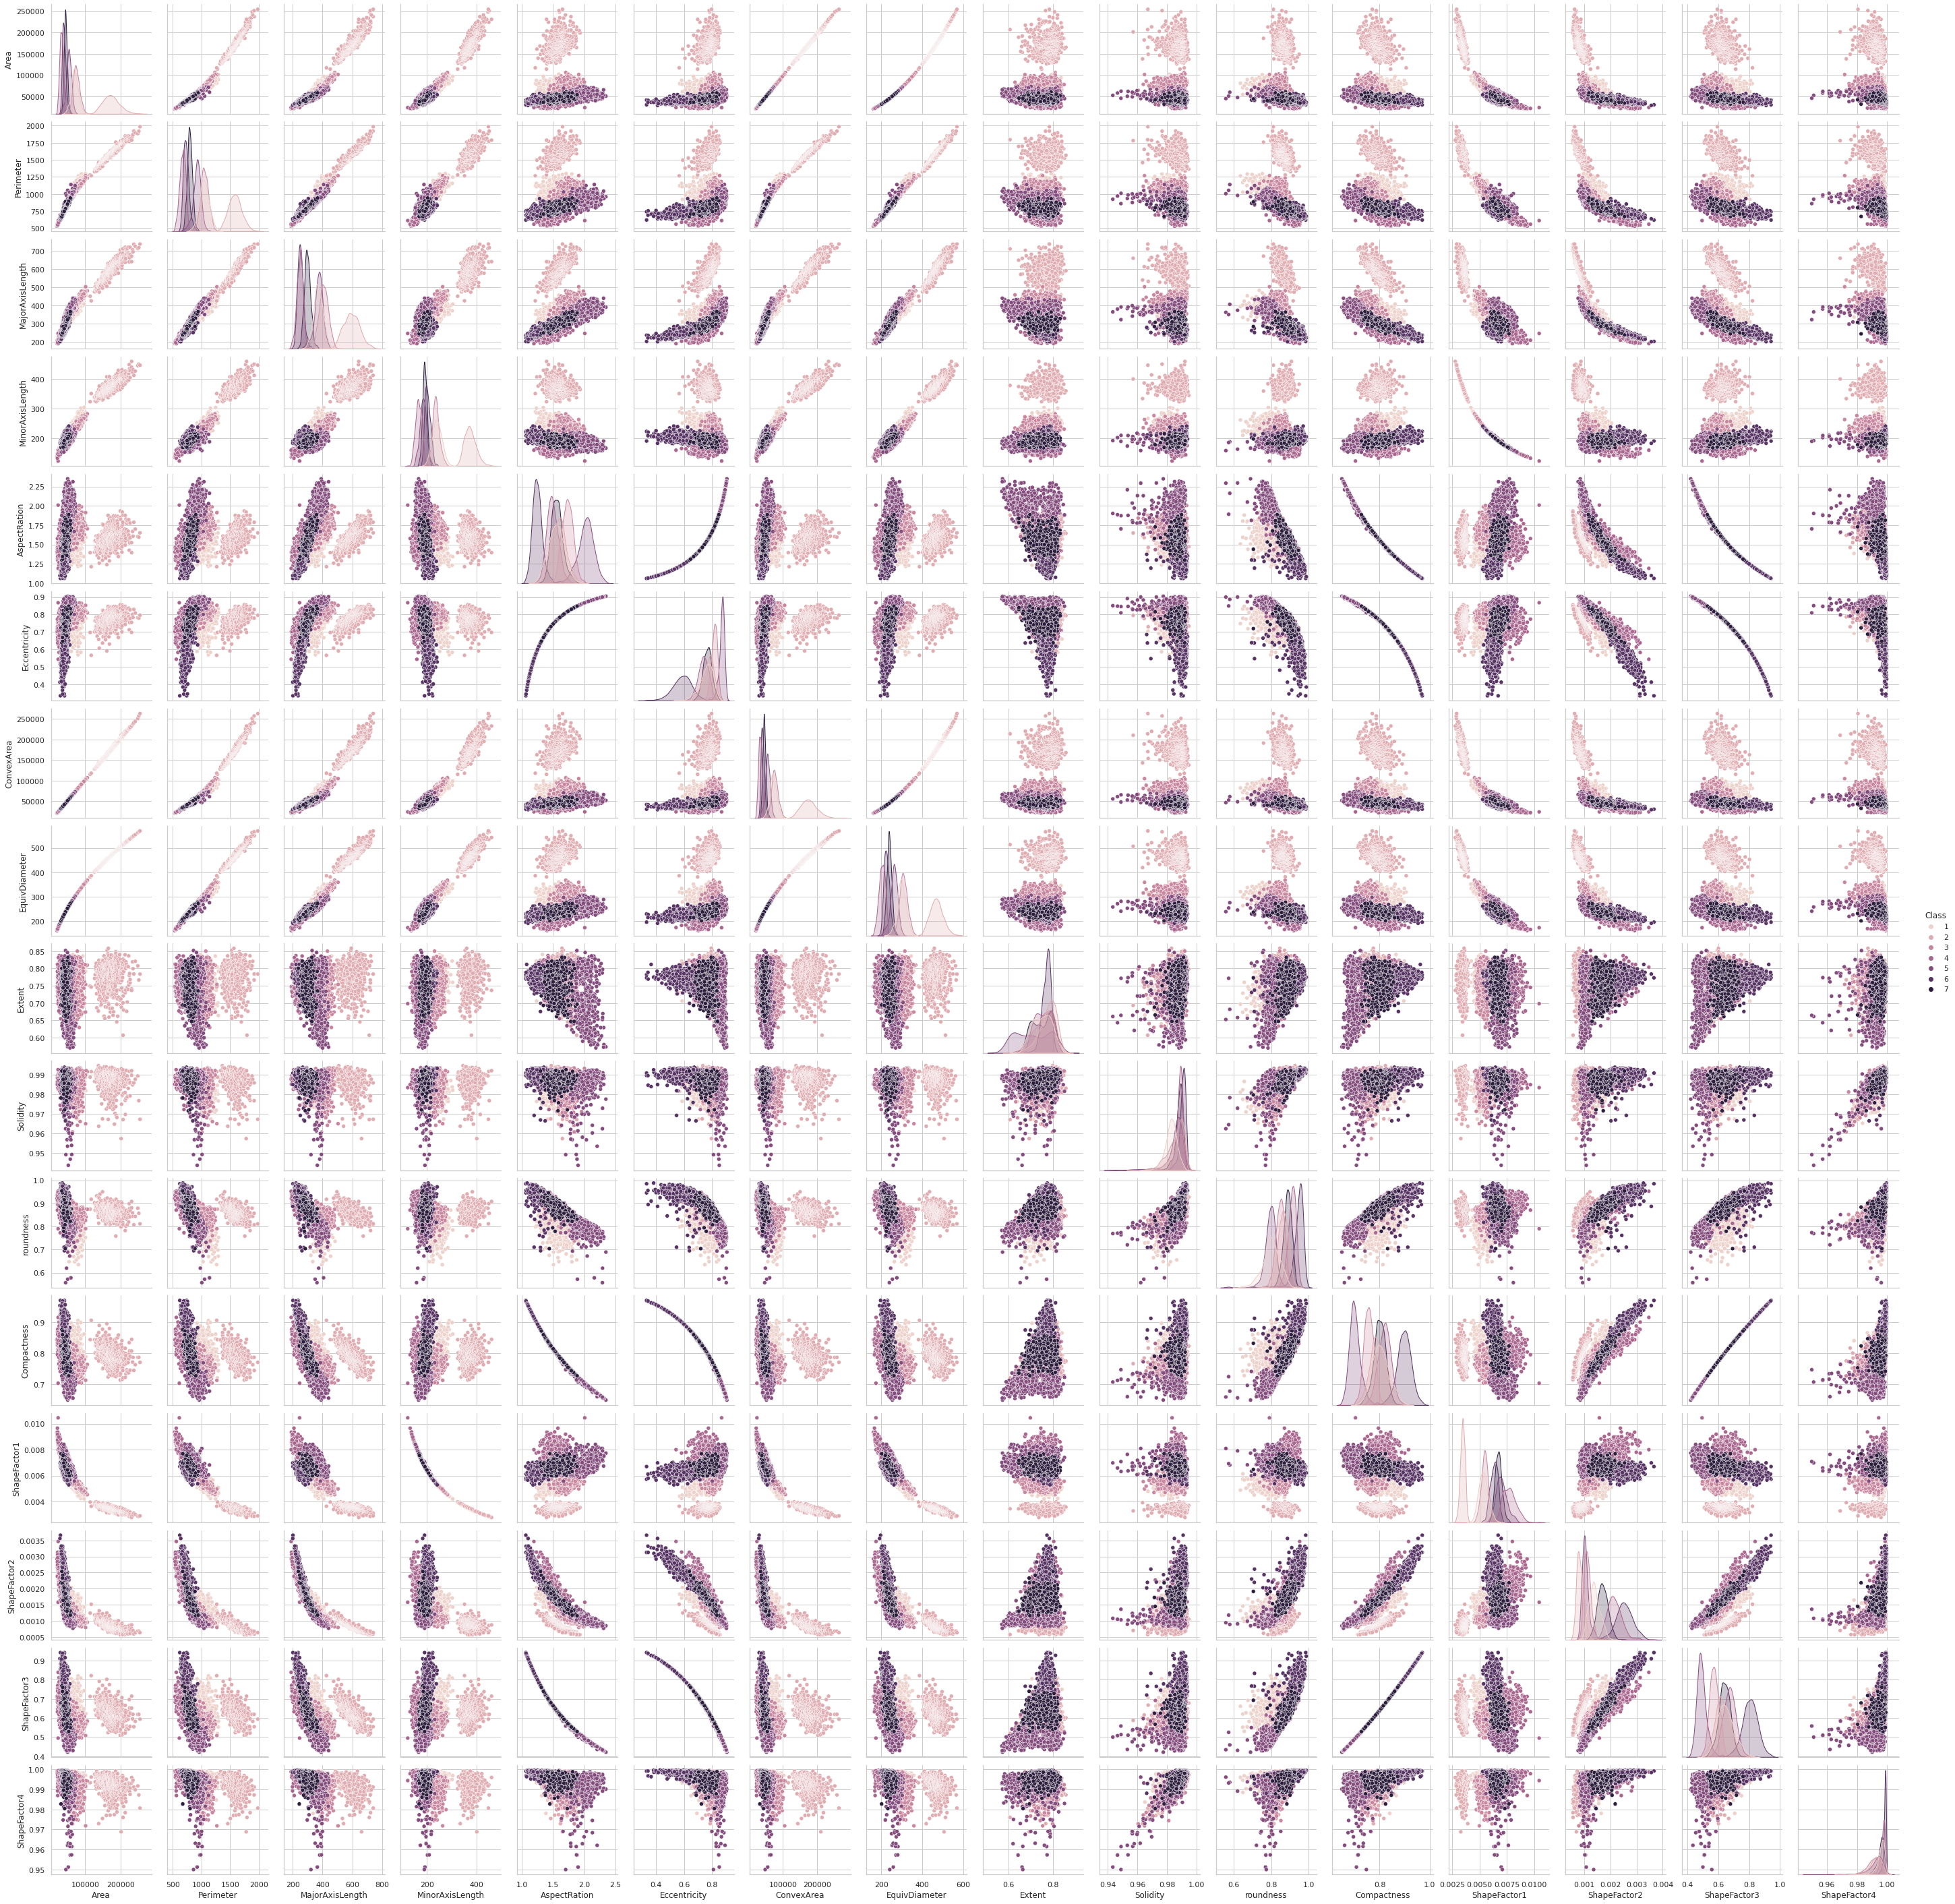

In [84]:
sns.pairplot(df_dea, hue='Class')

### Split y escalamiento de datos

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, random_state=42,shuffle=True,test_size=.20)

In [178]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test) 

## Entrenamiento y evaluación de regresión logística multiclase


### Modelo Multiclase

- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV).

In [179]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [180]:
parameters = {
    'solver':['lbfgs', 'sag', 'saga', 'newton-cg','liblinear'],
    'multi_class':['ovr','multinomial'],
}

In [181]:
model = LogisticRegression()
clf = GridSearchCV(model,
                   param_grid=parameters,
                   scoring='accuracy',
                   cv=10)

In [182]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg',
                                    'liblinear']},
             scoring='accuracy')

In [183]:
print('Mejores hiperparametros:', clf.best_params_)
print('Mejores accuracy:', clf.best_score_)

Mejores hiperparametros: {'multi_class': 'multinomial', 'solver': 'lbfgs'}
Mejores accuracy: 0.935674879611015


In [184]:
pred = clf.predict(X_test)

In [185]:
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[119   0   5   0   1   0   3]
 [  0  98   0   0   0   0   0]
 [  5   0  97   0   0   0   1]
 [  0   0   0  90   0   5  10]
 [  0   0   4   1  91   0   0]
 [  3   0   0   0   0  84   4]
 [  0   0   1   6   6   0  97]]
0.9247606019151847


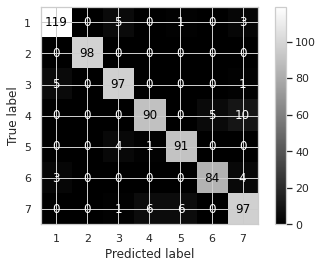

In [191]:
cm = confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='gray');

Después de probar diferentes combinaciones de parámetros en nuestro modelo de regresión logística, obtuvimos el mejor desempeño utilizando la estrategia de clasificación multinomial (multi_class='multinomial') y el solver 'lbfgs'. 

Con esta configuración, logramos obtener una precisión (accuracy) del 92.47%, lo que indica una buena capacidad del modelo para clasificar correctamente los tipos de frijoles en el conjunto de datos.